In [54]:
## Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [58]:
#Reading the data 
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [60]:
### Checking the shape of the dataframe
df.shape

(730, 16)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [64]:
#Missing value Check
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### As we can see there are no missing values present in the dataframe . 
#### So, there is no need to impute anything . we can go ahead with plotting

In [66]:
## Checking the dea+tails of Numerical data :-
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [68]:
### As we can see there exists some columns in the dataframe which we can drop as those don't have anything to do with the final target model prep
### So Dropping columns - dteday , instant , casual & registered

df.drop(['instant','dteday','casual','registered'] , axis =1 , inplace = True )
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [70]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [72]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [76]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


###### Plotting box plots for continuous variables

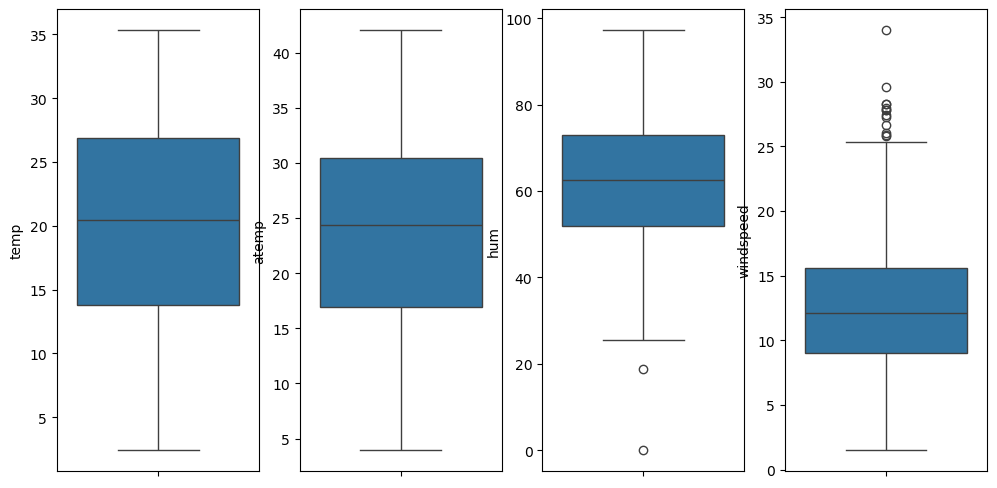

In [78]:
cont_cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(12,6))
i = 1
for col in cont_cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

##### From this boxplots , we can see that No such outliers are present in the dataset . 
##### So, We can go ahead with the data to implement Categorical values to some of the colums

In [80]:
#### Checking distinct values:-
df.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [82]:
#### Replacing these values with Proper data :- 
df['season'].replace ({1:'spring' , 2:'summer' , 3:'fall' , 4:'winter'} , inplace = True)
df.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [84]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [40]:
#Checking values for months & then replacing with values :- 
df.mnth.value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [86]:
df.mnth = df.mnth.map({1:'jan' , 2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'} )
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [88]:
df.mnth.value_counts()

mnth
jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: count, dtype: int64

In [90]:
df.weekday.value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [92]:
df.weekday= df.weekday.map({0:'sun' , 1: 'mon' , 2:'tue' , 3: 'wed' , 4:'thu' , 5: 'fri' , 6:'sat'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [94]:
df.yr.value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [96]:
df['yr'] = df['yr'].map({0:'2018' , 1:'2019'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [98]:
df.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [100]:
df.shape

(730, 12)

In [102]:
df.weathersit = df.weathersit.map ({1:'good' , 2:'moderate' , 3: 'bad' , 4 : 'severe'}) 
## 4 is optional as there is no existance of 4 but doing it to keep the EDA for any update in data
df.weathersit.value_counts()

weathersit
good        463
moderate    246
bad          21
Name: count, dtype: int64

#### To check the linear relation , using Pairplots :-

In [105]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


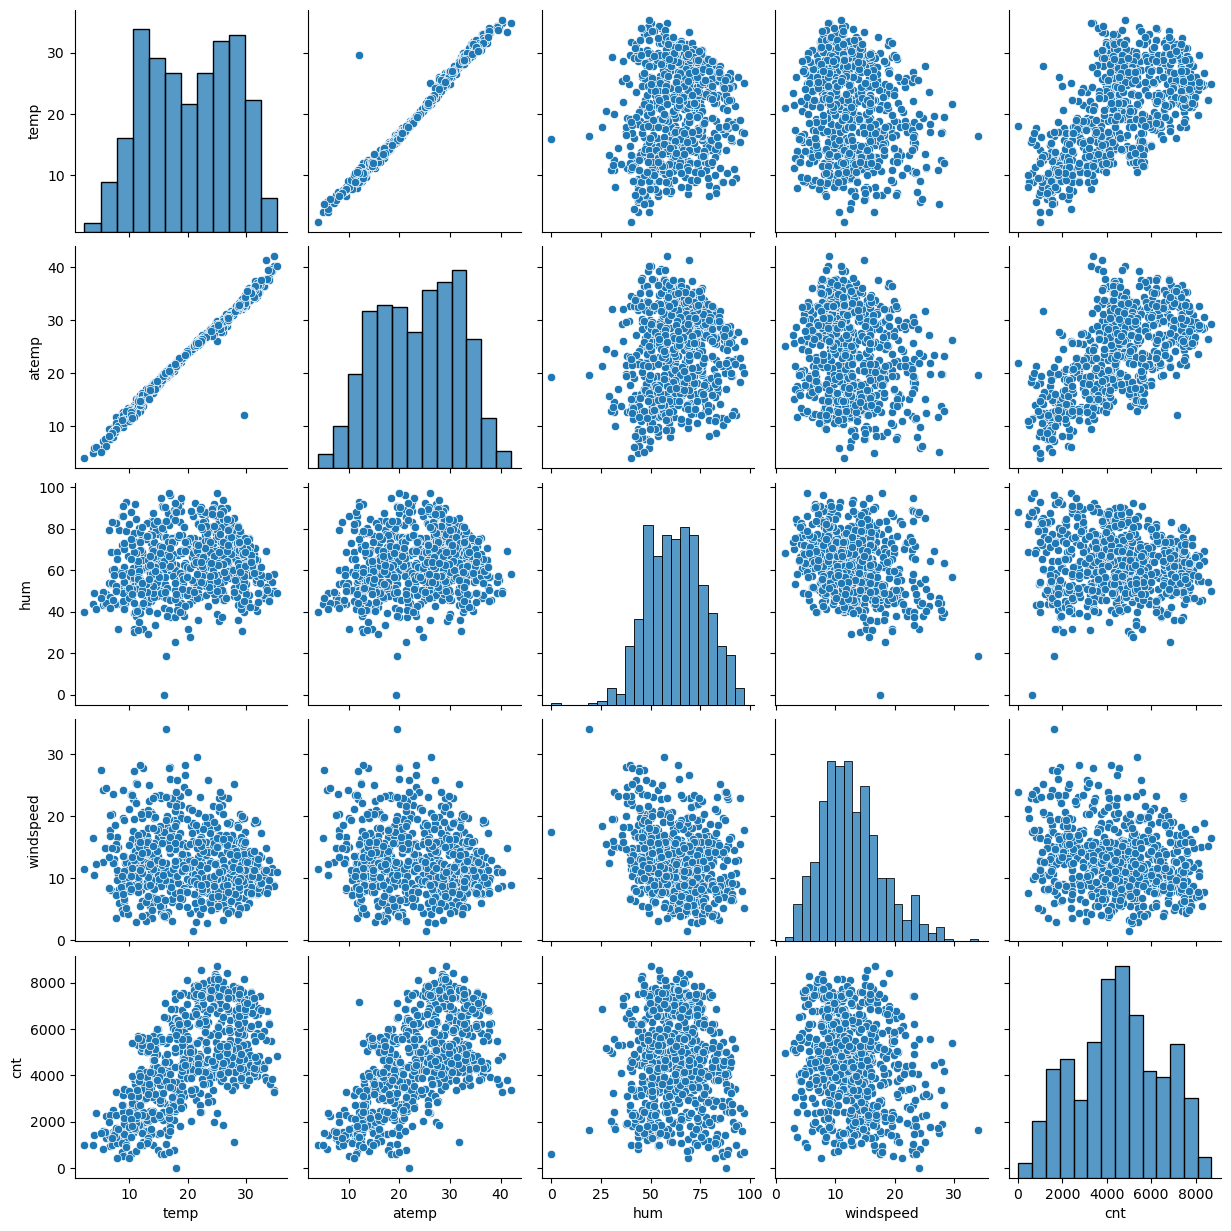

In [115]:

sns.pairplot (data = df , vars = ['temp','atemp','hum','windspeed','cnt'])
plt.show()

#### 1. Checking Correlation of these columns using heatmap

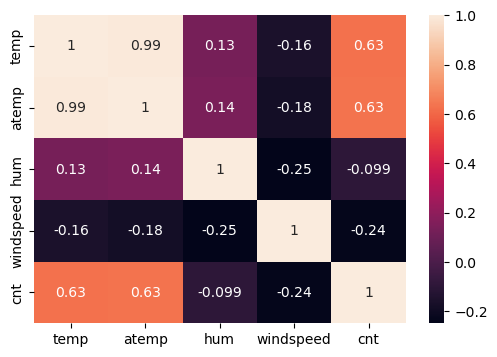

In [132]:
plt.figure(figsize = (6,4))
sns.heatmap ( df[['temp','atemp','hum','windspeed','cnt']].corr() , annot = True)
plt.show()

##### We can see temp & atemp are highly correlated 

#### 2. Categorical variables vs target variable boxplot

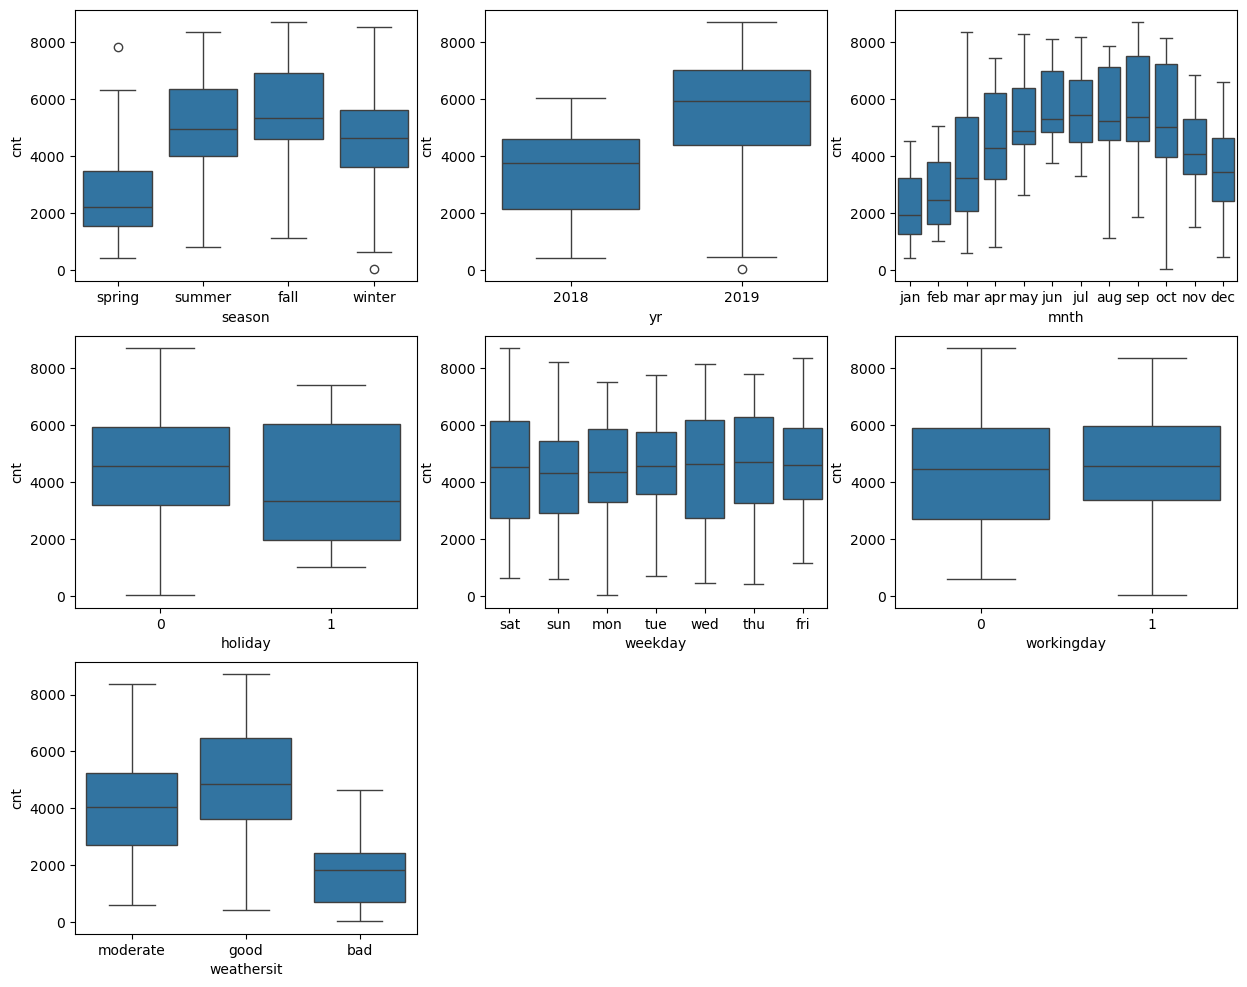

In [150]:
plt.figure(figsize=(15, 12))
cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
for i in enumerate(cat_cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
plt.show()

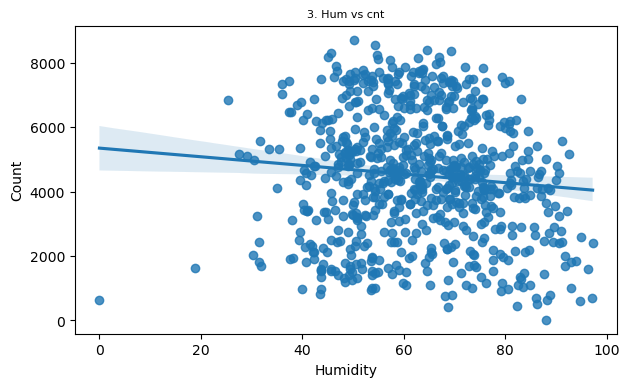

In [158]:
plt.figure(figsize=(7,4))
plt.title("3. Hum vs cnt",fontsize=8)
sns.regplot(data=df,x="hum",y="cnt")
plt.xlabel("Humidity")
plt.ylabel("Count")

plt.show()

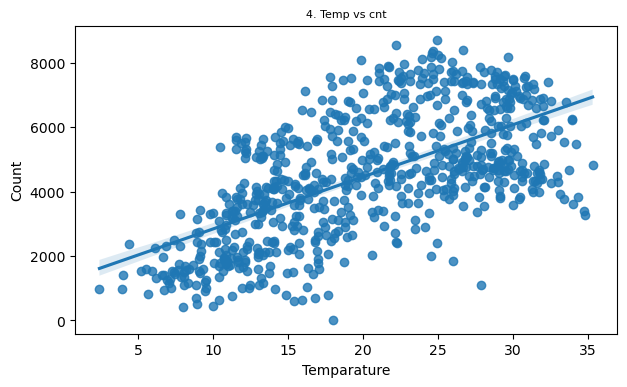

In [162]:
plt.figure(figsize=(7,4))
plt.title("4. Temp vs cnt",fontsize=8)
sns.regplot(data=df,x="temp",y="cnt")
plt.xlabel("Temparature")
plt.ylabel("Count")

plt.show()

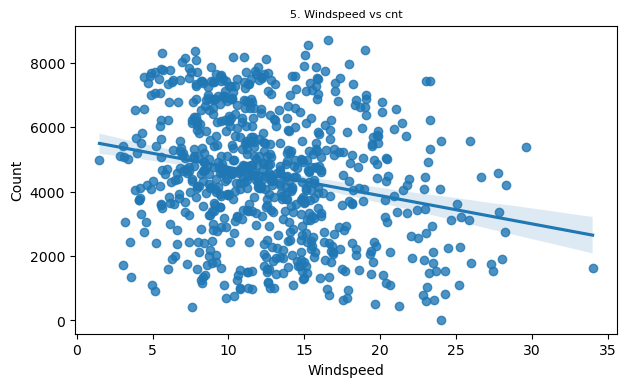

In [164]:
plt.figure(figsize=(7,4))
plt.title("5. Windspeed vs cnt",fontsize=8)
sns.regplot(data=df,x="windspeed",y="cnt")
plt.xlabel("Windspeed")
plt.ylabel("Count")

plt.show()

##### Conclusions from these Plots :-

###### We can come to these conclusions from these plots of EDA :-

* Demand is continuously growing each month till June ; It is a bit down in July ; Again highest in September & then it is decreasing again . 
* When weather is good demand is highest ; As Weather is becoming bad , Demand is decreasing .
* Fall season has highest demand for rental bikes; followed by summer , winter & spring .
* Demand is quite higher in 2019 than 2018 .
* Demand is higher if its not a holiday.
* From working day plots , nothing is conclusive . 
* Demand is positively correlated with temparature. 
* Demand is slightly negatively correlated with Humidity & Negatively correlated with Windspeed. Though , Humidity values are highly scattered . 
* As Temp & Atemp are highly correlated with eachother , We can say that one is derived from the other . So, anyone of them can be removed . 



## Pre-processing Steps

### Dummy Variable Creation (One Hot Encoding)

In [181]:
# Number of dummies = n-1
df=pd.get_dummies(data=df,columns=["season","mnth","weekday","weathersit"],drop_first=True)
df.shape

(730, 30)

In [183]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [186]:
df.columns=df.columns.astype(str)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,False,True,False,False,False,False,False,True
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,True,False,False,False,False,True
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,True,False,False,False,False,False,True,False
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,False,True,False,True,False
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,True,True,False


### Train-Test Split

In [188]:
#y contains target variable
y=df.pop('cnt')

#X contains all other independent variables
X=df

#Train Test split with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(X_train.shape)
print(X_test.shape)

(584, 29)
(146, 29)


## Scaling 

In [193]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)# As test data is unseen data we can't fit on it ; so using only transform
X_test

array([[-1.02778306,  5.95818764, -1.41785376, ..., -0.42683279,
        -1.30526001,  1.38564065],
       [ 0.97296797, -0.16783627,  0.70529136, ...,  2.34283779,
         0.76613088, -0.72168784],
       [-1.02778306, -0.16783627,  0.70529136, ..., -0.42683279,
        -1.30526001,  1.38564065],
       ...,
       [-1.02778306, -0.16783627,  0.70529136, ..., -0.42683279,
         0.76613088, -0.72168784],
       [ 0.97296797, -0.16783627, -1.41785376, ..., -0.42683279,
         0.76613088, -0.72168784],
       [-1.02778306, -0.16783627,  0.70529136, ..., -0.42683279,
        -1.30526001,  1.38564065]])

In [195]:
X_train_df=pd.DataFrame(X_train,columns=X.columns)
X_test_df=pd.DataFrame(X_test,columns=X.columns)
X_train_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0.972968,-0.167836,0.705291,-1.884077,-2.133573,-1.351866,2.236778,1.724178,-0.572078,-0.577350,...,-0.319197,-0.295843,-0.418390,-0.421212,-0.426833,-0.395519,2.546994,-0.426833,0.766131,-0.721688
1,0.972968,-0.167836,0.705291,-0.306750,-0.241154,-1.193941,-0.119144,-0.579987,-0.572078,1.732051,...,3.132860,-0.295843,-0.418390,-0.421212,-0.426833,2.528321,-0.392620,-0.426833,0.766131,-0.721688
2,-1.027783,-0.167836,0.705291,-0.417439,-0.444845,-1.819690,2.905344,1.724178,-0.572078,-0.577350,...,-0.319197,-0.295843,2.390114,-0.421212,-0.426833,-0.395519,-0.392620,-0.426833,0.766131,-0.721688
3,0.972968,-0.167836,0.705291,-0.938605,-0.918998,0.957450,-0.771827,-0.579987,-0.572078,1.732051,...,-0.319197,-0.295843,-0.418390,-0.421212,-0.426833,-0.395519,-0.392620,-0.426833,-1.305260,1.385641
4,0.972968,-0.167836,-1.417854,-1.791834,-1.914161,-1.509791,0.772439,1.724178,-0.572078,-0.577350,...,-0.319197,-0.295843,-0.418390,-0.421212,2.342838,-0.395519,-0.392620,-0.426833,0.766131,-0.721688


### Feature Selection 

In [200]:
# Importing Libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [268]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=12)
selector=selector.fit(X_train_df,y_train)
selector.support_

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True,  True])

In [270]:
selected_features=X_train_df.columns[selector.support_]
print(selected_features)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sep', 'weekday_sun',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')


In [272]:
X_train=X_train_df[selected_features]
X_test=X_test_df[selected_features]

### Modellling

### Model :- 1

In [274]:
import statsmodels.api as sm

In [276]:
X_train_sm=sm.add_constant(X_train)#X_train_sm["const"]=1
X_test_sm=sm.add_constant(X_test)

In [278]:
model1=sm.OLS(np.array(y_train),X_train_sm)# Ordinary Least Squares
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     267.6
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          2.75e-225
Time:                        20:32:57   Log-Likelihood:                -4702.8
No. Observations:                 584   AIC:                             9432.
Df Residuals:                     571   BIC:                             9488.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4505.2671     31.820    141.585      0.000    4442.768    4567.766
yr                    982.5406     32.311     30.409      0.000     919.078    1046.003
holiday              -160.9599     32.130     -5.010      0.000    -224.067     -97.853
temp                 1024.9275     59.242     17.301      0.000     908.568    1141.287
hum                  -193.1780     44.136     -4.377      0.000    -279.867    -106.489
windspeed            -258.5553     34.720     -7.447      0.000    -326.750    -190.361
season_spring        -177.8062     70.497     -2.522      0.012    -316.271     -39.342
season_summer         264.4710     47.488      5.569      0.000     171.198     357.744
season_winter         437.1633     56.550      7.731      0.000     326.093     548.234
mnth_sep              214.0262     34.470      6.209      0.000     146.323     281.729
weekday_sun          -165.9741     32.053     -5.178      0.000    -228.931    -103.018
weathersit_good      1060.9668    104.991     10.105      0.000     854.750    1267.183
weathersit_moderate   816.0089     97.669      8.355      0.000     624.174    1007.843
==============================================================================
Omnibus:                       84.605   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.091
Skew:                          -0.757   Prob(JB):                     1.07e-45
Kurtosis:                       5.493   Cond. No.                         6.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Calculating VIF Data for Model 1

In [280]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.031076
2,holiday,1.019559
3,temp,3.466259
4,hum,1.923896
5,windspeed,1.190577
6,season_spring,4.908328
7,season_summer,2.227245
8,season_winter,3.158310
9,mnth_sep,1.173473


##### Here we can see , all P values are within proper range (<0.05) but as of now VIFs for two columns weathersit_good & weathersit_moderate are pretty high .

###### So, Lets delete the highest VIF column weathersit_good & reconstruct the model ...


### Model 2 :-

In [282]:
X_train_sm=X_train_sm.drop("weathersit_good",axis=1)
X_test_sm=X_test_sm.drop("weathersit_good",axis=1)
## Rebuilding the Model
model2=sm.OLS(np.array(y_train),X_train_sm)# Ordinary Least Squares
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     240.2
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          3.71e-206
Time:                        20:33:42   Log-Likelihood:                -4750.8
No. Observations:                 584   AIC:                             9526.
Df Residuals:                     572   BIC:                             9578.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4505.2671     34.518    130.518      0.000    4437.469    4573.065
yr                    977.7511     35.047     27.898      0.000     908.915    1046.587
holiday              -147.9668     34.826     -4.249      0.000    -216.370     -79.564
temp                 1100.7810     63.748     17.268      0.000     975.572    1225.989
hum                  -370.7509     43.920     -8.441      0.000    -457.015    -284.486
windspeed            -331.3023     36.846     -8.992      0.000    -403.672    -258.933
season_spring        -126.3305     76.275     -1.656      0.098    -276.143      23.482
season_summer         295.2792     51.409      5.744      0.000     194.306     396.252
season_winter         463.2352     61.281      7.559      0.000     342.872     583.598
mnth_sep              216.3740     37.392      5.787      0.000     142.932     289.816
weekday_sun          -145.0010     34.698     -4.179      0.000    -213.152     -76.850
weathersit_moderate   -93.3976     41.172     -2.268      0.024    -174.263     -12.532
==============================================================================
Omnibus:                      123.087   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              329.483
Skew:                          -1.045   Prob(JB):                     2.84e-72
Kurtosis:                       6.028   Cond. No.                         4.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### We can season_spring column is having high P value ( Above permissible limit of 0.05 ) . So, we should drop this column & rebuild the model.

In [288]:
X_train_sm=X_train_sm.drop("season_spring",axis=1)
X_test_sm=X_test_sm.drop("season_spring",axis=1)
## Rebuilding the Model
model3=sm.OLS(np.array(y_train),X_train_sm)# Ordinary Least Squares
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     263.1
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          8.71e-207
Time:                        20:38:18   Log-Likelihood:                -4752.2
No. Observations:                 584   AIC:                             9526.
Df Residuals:                     573   BIC:                             9575.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4505.2671     34.571    130.320      0.000    4437.366    4573.168
yr                    973.5800     35.009     27.809      0.000     904.818    1042.342
holiday              -149.8885     34.860     -4.300      0.000    -218.357     -81.420
temp                 1184.9746     38.526     30.758      0.000    1109.305    1260.644
hum                  -376.5163     43.849     -8.587      0.000    -462.640    -290.393
windspeed            -336.1387     36.786     -9.138      0.000    -408.390    -263.888
season_summer         352.9320     37.889      9.315      0.000     278.515     427.349
season_winter         542.5084     38.327     14.155      0.000     467.230     617.787
mnth_sep              230.2631     36.495      6.309      0.000     158.583     301.943
weekday_sun          -145.1680     34.751     -4.177      0.000    -213.422     -76.914
weathersit_moderate   -90.5595     41.198     -2.198      0.028    -171.478      -9.641
==============================================================================
Omnibus:                      119.527   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.296
Skew:                          -1.033   Prob(JB):                     5.08e-67
Kurtosis:                       5.877   Cond. No.                         2.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Calculating VIF Data for Model 3

In [291]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.025531
2,holiday,1.016796
3,temp,1.241899
4,hum,1.608760
5,windspeed,1.132237
6,season_summer,1.201152
7,season_winter,1.229102
8,mnth_sep,1.114400
9,weekday_sun,1.010432


###### As we can see for Model 3 , R_Sqrd value & Adjusted R Sqrd Values are quite good & all selected variables are having very good P value & VIF value . So, we can consider Model 3 as our final model. 

In [298]:
y_train_pred=res3.predict(X_train_sm)
y_test_pred=res3.predict(X_test_sm)

In [300]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train:",round(r2_train,3),"Test:",round(r2_test,3))

Train: 0.821 Test: 0.766


### We can see that R Sqrd value for Train & Test Data is quite close & value is also around 76.6% for the test data . 
### So, We can conclude that our model is working fine . 

Text(0.5, 0, 'Errors')

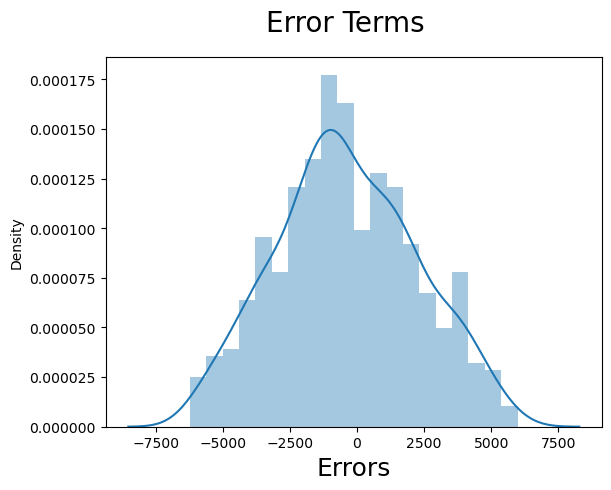

In [304]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

##### As we can see Errors are normally distributed with mean0 . So, Everything looks good .

In [317]:
X_train_sm.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_sep', 'weekday_sun', 'weathersit_moderate'],
      dtype='object')

##### Conclusions :- 
Variables to predict the demand for shared bikes are :-

Year (2019), 
Holiday,
Temparature, 
Humidity,
Windspeed,
Season (Summer),
Season(Winter),
Month(September),
Weekday(Sunday),
Moderate Weather